# Loss Meme Classifier

This is a very basic image classifier that classifies Loss Memes and Non-Loss Memes using the [Fastai](https://docs.fast.ai/) library.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

Setting which GPU to train on

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.set_device(0)

## Data Cleaning

In [5]:
path = Path('data/memes'); path

PosixPath('data/memes')

In [6]:
path.ls()

[PosixPath('data/memes/loss'),
 PosixPath('data/memes/gi_not_loss.txt'),
 PosixPath('data/memes/models'),
 PosixPath('data/memes/not_loss'),
 PosixPath('data/memes/gi_loss.txt')]

### Downloading Images from Google Images

To get a big dataset of images to train on, we can scrape google images for loss memes/non-loss memes. I followed [this guide](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb) for doing so using the Fastai library.

In [7]:
folder = 'loss'
file = 'gi_loss.txt'

In [ ]:
folder = 'not_loss'
file = 'gi_not_loss.txt'

In [ ]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

Download images

In [ ]:
classes = ['loss','not_loss']

In [ ]:
download_images(path/file, dest, max_pics=200)

Remove any images/non-images that can't be opened

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

### Setting up Datablock

I wanted to demonstrate the basic format for the fastai [datablock](https://docs.fast.ai/data_block.html) structure. The Fastai library has the Datablock API which makes formatting your data to be ready for model training very easy. It's one of the big things introduced in v1 of the Fastai library.

In [8]:
tfms = get_transforms(do_flip=False, max_rotate=0, max_zoom=1.1, max_lighting=0.2, max_warp=0)

data = (ImageItemList.from_folder(path) #What folder to find all your images/subfolders
        .random_split_by_pct()          #Splitting train/valid across all folders by percentage
        .label_from_folder()            #Using Folder Names as image labels
        .transform(tfms, size=244)      #Image transforms
        .databunch()                    #Converting dataloader into a databunch
       )

Imagesizes need to be divisible by 32 and in squares (usually) for most CNN's. Fastai v1 now has some compatability with rectangular images, but for simplicity sake ```vision.data.verify_images``` will make sure all our images are squares. Only need to run once. This happens when you create your databunch automatically.

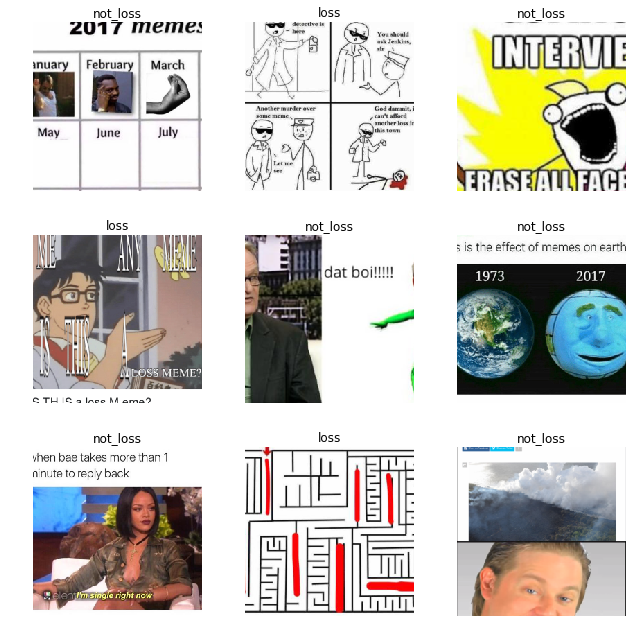

In [9]:
data.show_batch(rows=3, figsize=(9,9))

## Training

In [10]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy
1,0.689409,0.540159,0.788732
2,0.524934,0.621338,0.802817
3,0.441257,0.652243,0.830986
4,0.394131,0.592733,0.845070
5,0.344200,0.593683,0.816901


In [13]:
learn.export()

## Results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(2, figsize=(6,6))

In [ ]:
interp.plot_confusion_matrix()